# Data Dive

## Dataset

This dataset offers a detailed snapshot of global retail sales from the fast-growing sneaker and streetwear market between January and August 2022. It captures essential sales insights from multiple countries, spanning brands like Nike, Adidas, Supreme, Yeezy, and Off-White, along with high-demand categories such as sneakers, hoodies, joggers, and graphic tees.

Source: [Sneakers and Streetwear](https://www.kaggle.com/datasets/atharvasoundankar/sneakers-and-streetwear-sales-2022?resource=download)

Put a link to the Datasheet

In [1]:
from datascience import * # Import the datascience
import numpy as np # Import numpy using the alias np
import matplotlib.pyplot as plt # Import matplotlib.pyplot using the alias plt

# Magic command to make plot appear in the notebook
%matplotlib inline 

In [2]:
ss = Table.read_table('data/sneakers_streetwear_sales_data.csv')

In [9]:
ss.show(3)

Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
5/27/22,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.1,Card
8/22/22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
4/3/22,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292,292,Cash on Delivery


### Data Dive

- List the number of rows, columns, and the column names.
- Data Moves
   - Summarize
   - Calculate

In [12]:
unit_price = ss.column('Unit Price ($)')
np.mean(unit_price)

174.60705382436259

# Filter

Filter by product type.

In [31]:
cap = ss.where('Product Type', are.equal_to('Cap'))
hoodie = ss.where('Product Type', are.equal_to('Hoodie'))
joggers = ss.where('Product Type', are.equal_to('Joggers'))
sneakers = ss.where('Product Type', are.equal_to('Sneakers'))
tshirt = ss.where('Product Type', are.equal_to('T-shirt'))

In [21]:
tbl = ss.group('Product Type')
tbl

Product Type,count
Cap,29
Hoodie,121
Joggers,41
Sneakers,136
T-shirt,26


In [23]:
tbl.with_column(
    'proportion',
    np.round(tbl.column('count')/ss.num_rows, 2)
)

Product Type,count,proportion
Cap,29,0.08
Hoodie,121,0.34
Joggers,41,0.12
Sneakers,136,0.39
T-shirt,26,0.07


In [32]:
cap_avg = np.mean(cap.column('Unit Price ($)'))
hoodie_avg = np.mean(hoodie.column('Unit Price ($)'))
joggers_avg = np.mean(joggers.column('Unit Price ($)'))
sneakers_avg = np.mean(sneakers.column('Unit Price ($)'))
tshirt_avg = np.mean(tshirt.column('Unit Price ($)'))

tbl.with_columns(
    'proportion',
    np.round(tbl.column('count')/ss.num_rows, 2),
    'mean_unit_price',
    [cap_avg, hoodie_avg, joggers_avg, sneakers_avg, tshirt_avg]
)

Product Type,count,proportion,mean_unit_price
Cap,29,0.08,166.116
Hoodie,121,0.34,164.943
Joggers,41,0.12,184.834
Sneakers,136,0.39,182.749
T-shirt,26,0.07,170.339


In [29]:
[cap_avg, hoodie_avg, joggers_avg, sneakers_avg, tshirt_avg]

[166.11586206896553, 164.94297520661155, nan, nan, nan]

In [16]:
ss.group('Product Type').with_column(
    'proportion',
    np.round(ss.group('Product Type').column('count')/ss.num_rows, 2)
)

Product Type,count,proportion
Cap,29,0.08
Hoodie,121,0.34
Joggers,41,0.12
Sneakers,136,0.39
T-shirt,26,0.07


In [48]:
ss.group('Product Type').with_column(
    'proportion',
    np.round(ss.group('Product Type').column('count')/ss.num_rows, 2)
).where('proportion', are.above(0.2))

Product Type,count,proportion
Hoodie,121,0.34
Sneakers,136,0.39


In [47]:
cap_rows = ss.where('Product Type', 'Cap')

cap_unit_price_column = cap_rows.column('Unit Price ($)')

avg_cap_price = np.mean(cap_unit_price_column)

rounded_avg_cap_price = round(avg_cap_price)

rounded_avg_cap_price

166

In [42]:
avg_cap_price = round(np.mean(ss.where('Product Type', 'Cap').column('Unit Price ($)')))

In [43]:
ss.where('Product Type', 'Cap')

Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
4/2/22,New Era Cap,Cap,New Era,Women,Sportswear,Germany,1,167.77,167.77,Cash on Delivery
4/8/22,New Era Cap,Cap,New Era,Men,Limited Edition,UK,4,107.31,429.24,UPI
5/7/22,New Era Cap,Cap,New Era,Men,Sportswear,USA,3,295.25,885.75,Wallet
6/28/22,New Era Cap,Cap,New Era,Women,Casual,Canada,4,185.54,742.16,UPI
7/24/22,New Era Cap,Cap,New Era,Unisex,Limited Edition,India,4,135.07,540.28,Cash on Delivery
2/13/22,New Era Cap,Cap,New Era,Women,Streetwear,Germany,4,212.66,850.64,Wallet
3/9/22,New Era Cap,Cap,New Era,Men,Casual,India,3,136.36,409.08,Card
7/1/22,New Era Cap,Cap,New Era,Women,Limited Edition,Australia,4,270.55,1082.2,Cash on Delivery
1/10/22,New Era Cap,Cap,New Era,Unisex,Sportswear,USA,4,56.4,225.6,Card
3/7/22,New Era Cap,Cap,New Era,Men,Sportswear,Japan,4,207.05,828.2,UPI


In [51]:
ss.show(3)

Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
5/27/22,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.1,Card
8/22/22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
4/3/22,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292,292,Cash on Delivery


In [57]:
unit_price_array = ss.column('Unit Price ($)')

In [59]:
unit_price_table = Table().with_column('unit_price', unit_price_array)

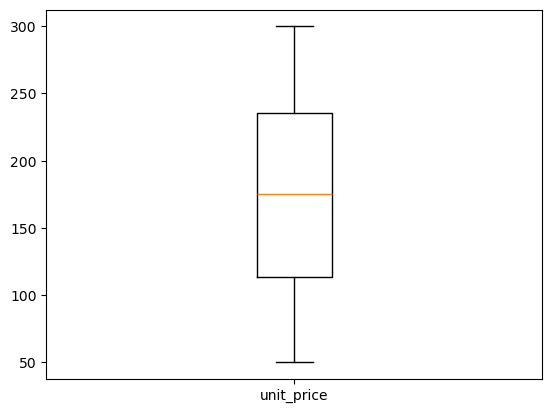

In [60]:
unit_price_table.boxplot()

In [61]:
ss.group('Product Type')

Product Type,count
Cap,29
Hoodie,121
Joggers,41
Sneakers,136
T-shirt,26


In [62]:
[1, 2, 3]

[1, 2, 3]

In [68]:
nested_list = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

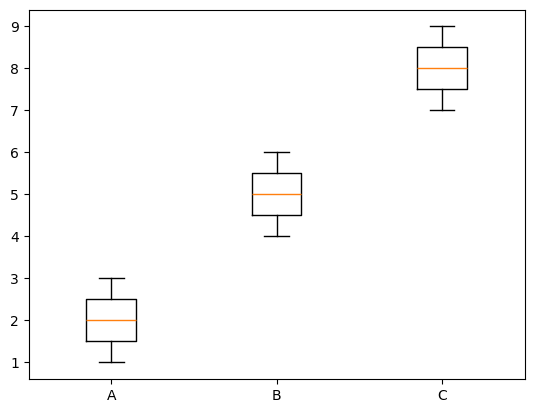

In [71]:
plt.boxplot(nested_list)
plt.xticks([1, 2, 3], ['A', 'B', 'C']);

In [74]:
sneakers_unit_price = ss.where('Product Type', 'Sneakers').column('Unit Price ($)')
hoodie_unit_price = ss.where('Product Type', 'Hoodie').column('Unit Price ($)')

In [78]:
data = [sneakers_unit_price, hoodie_unit_price]
data

[array([ 267.34,  292.  ,  184.51,  128.86,  199.47,  298.22,  117.18,
         295.75,  104.16,   64.66,  295.53,   63.73,  172.68,  203.05,
         134.39,   70.69,  223.  ,  124.4 ,   80.33,  183.55,  218.82,
         208.47,   96.97,  261.31,  239.55,   94.62,  170.86,  105.79,
         112.95,   56.49,  160.44,  209.81,  261.96,  299.3 ,  162.85,
          54.99,  185.7 ,   67.2 ,  122.32,  278.15,  199.42,   98.23,
         114.47,  104.04,  215.38,  127.55,  182.2 ,  262.68,  101.39,
         228.88,  258.6 ,  129.95,  190.03,  209.13,  256.81,  127.11,
         112.04,  132.09,   90.19,  117.78,  214.93,  141.35,  188.4 ,
         277.48,  209.69,  176.98,  239.54,  148.11,   81.97,  291.29,
         138.95,  208.19,  291.7 ,  171.49,  158.82,  196.45,  213.66,
         164.57,  203.25,  209.3 ,  112.26,  216.83,  283.7 ,   51.81,
         248.44,  107.04,  118.37,  150.02,  135.5 ,  145.89,  121.42,
         265.91,  275.27,  270.52,  119.36,  202.28,  277.26,  130.97,
      

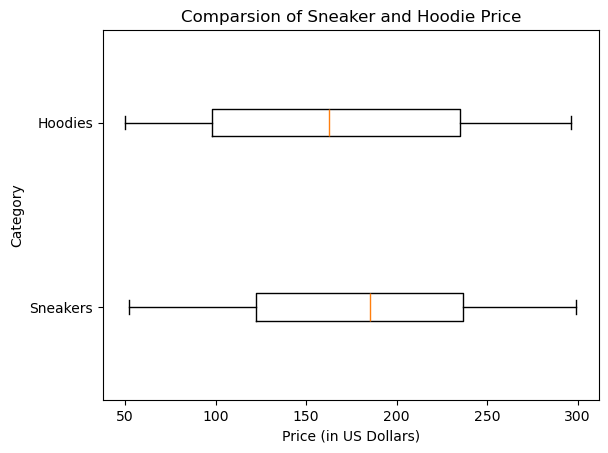

In [88]:
plt.boxplot(data, vert = False)

plt.title('Comparsion of Sneaker and Hoodie Price')
plt.xlabel('Price (in US Dollars)')
plt.ylabel('Category')
plt.yticks([1, 2], ['Sneakers', 'Hoodies']);